## Libraries

In [1]:
%matplotlib inline
import vgg16
from tfparser import *
from datahelper import *

import os
import sys
import glob
import numpy as np
import tensorflow as tf
from sklearn.model_selection import KFold

c:\users\jojinwoo\appdata\local\programs\python\python35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Load subjects

In [2]:
path = 'D:/mimicdb/180521_ch2_30s/';
txtname = 'subject.txt';
subjects = load_subjects(path, txtname)
print(subjects)

[220 443 224 213 281 408 411 259 252 452 449 427 476 230 417 276 485 211
 439 226 471 472 262 401 446 437 225 284 240 216 212 484 438 237 404 413
 482 450]


# Test

In [3]:
def test_fn(sess, iterator, dataset):
    print("Testing...")
    sess.run(iterator.initializer)
    
    labels = np.array([])
    predictions = np.array([])
    annotations = np.array([])

    while True:
        try:
            ECG, PPG, SBP, DBP, annotation = sess.run(dataset)
            ECG = min_max_scaler(ECG)
            PPG = min_max_scaler(PPG)
            x_batch = np.dstack([ECG, PPG])
            y_batch = np.hstack([SBP, DBP])
            prediction = sess.run ([model.predictions],
                          feed_dict={
                              model.input_x: x_batch,
                              model.input_y: y_batch,
                              model.dropout_keep_prob: 1.0
                          })

            prediction  = np.squeeze(np.array(prediction))
            labels      = np.concatenate((labels, y_batch), axis=0) if labels.size else y_batch
            predictions = np.concatenate((predictions, prediction), axis=0) if predictions.size else prediction
            annotations = np.concatenate((annotations, annotation), axis=0) if annotations.size else annotation
        except tf.errors.OutOfRangeError:
            break

    export_result(labels, predictions, annotations)

# Train

train index: [220 443 213 281 408 411 259 252 452 476 230 417 211 439 226 472 401 446
 284 240 212 484 438 237 404 413 482 450]
validate index : [224 449 427 276 485]
test index : [471 262 437 225 216]
Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead
Tensor("pool1/Squeeze:0", shape=(?, 1250, 64), dtype=float32)
Tensor("pool2/Squeeze:0", shape=(?, 417, 128), dtype=float32)
Tensor("pool3/Squeeze:0", shape=(?, 139, 256), dtype=float32)
Tensor("pool4/Squeeze:0", shape=(?, 47, 512), dtype=float32)
Instructions for updating:
Use the retry module or similar alternatives.
Tensor("Flatten/flatten/Reshape:0", shape=(?, 8192), dtype=float32)
Tensor("dropout/mul:0", shape=(?, 4096), dtype=float32)
Tensor("dropout_1/mul:0", shape=(?, 4096), dtype=float32)
Tensor("fc8/BiasAdd:0", shape=(?, 2), dtype=float32)
training...
Testing...
saved 12.51_9.78_y.txt
saved 12.51_9.78_p.txt
saved 12.51_9.78_i.txt
Testing...
saved 12.45_11.56_y.txt
saved 12.45_11.56_p.txt
saved 12.

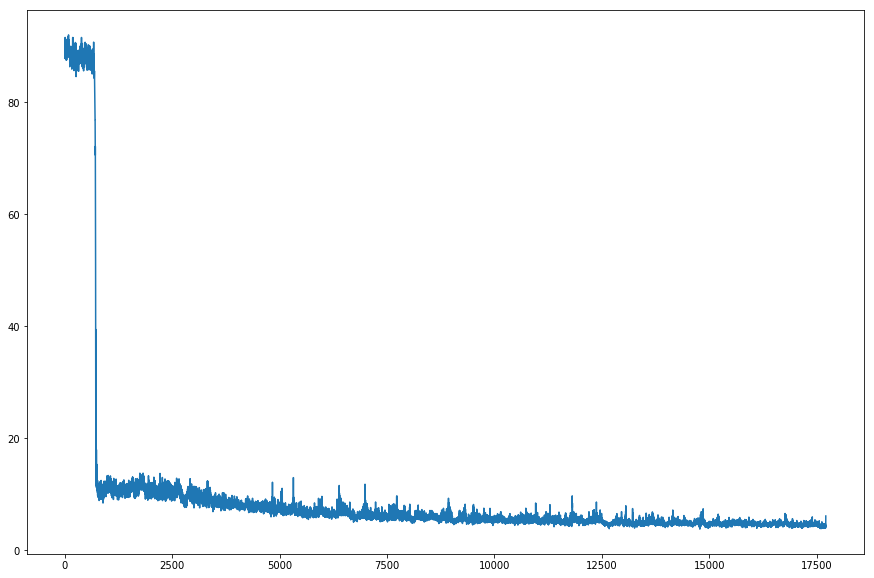

train index: [220 443 224 213 281 411 259 452 449 427 476 417 276 485 211 439 226 471
 472 262 401 446 437 225 284 240 216 482]
validate index : [408 252 230 212 484]
test index : [438 237 404 413 450]
Tensor("pool1/Squeeze:0", shape=(?, 1250, 64), dtype=float32)
Tensor("pool2/Squeeze:0", shape=(?, 417, 128), dtype=float32)
Tensor("pool3/Squeeze:0", shape=(?, 139, 256), dtype=float32)
Tensor("pool4/Squeeze:0", shape=(?, 47, 512), dtype=float32)
Tensor("Flatten/flatten/Reshape:0", shape=(?, 8192), dtype=float32)
Tensor("dropout/mul:0", shape=(?, 4096), dtype=float32)
Tensor("dropout_1/mul:0", shape=(?, 4096), dtype=float32)
Tensor("fc8/BiasAdd:0", shape=(?, 2), dtype=float32)
training...
Testing...
saved 20.68_11.35_y.txt
saved 20.68_11.35_p.txt
saved 20.68_11.35_i.txt
Testing...
saved 21.07_11.30_y.txt
saved 21.07_11.30_p.txt
saved 21.07_11.30_i.txt
Testing...
saved 23.09_13.17_y.txt
saved 23.09_13.17_p.txt
saved 23.09_13.17_i.txt
Testing...
saved 19.06_8.62_y.txt
saved 19.06_8.62_p.tx

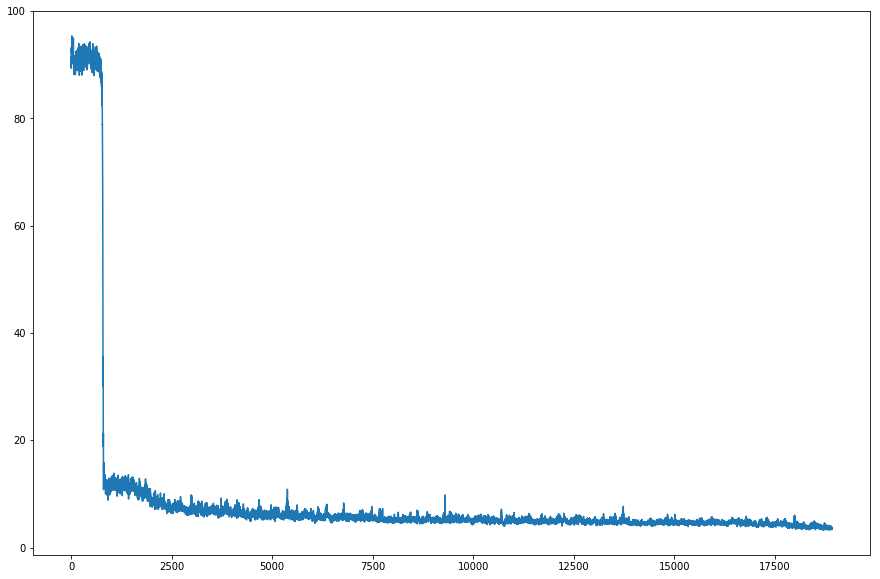

train index: [220 224 213 281 408 252 452 449 427 230 276 485 439 226 471 472 262 401
 437 225 216 212 484 438 237 404 413 482 450]
validate index : [443 411 259 476]
test index : [417 211 446 284 240]
Tensor("pool1/Squeeze:0", shape=(?, 1250, 64), dtype=float32)
Tensor("pool2/Squeeze:0", shape=(?, 417, 128), dtype=float32)
Tensor("pool3/Squeeze:0", shape=(?, 139, 256), dtype=float32)
Tensor("pool4/Squeeze:0", shape=(?, 47, 512), dtype=float32)
Tensor("Flatten/flatten/Reshape:0", shape=(?, 8192), dtype=float32)
Tensor("dropout/mul:0", shape=(?, 4096), dtype=float32)
Tensor("dropout_1/mul:0", shape=(?, 4096), dtype=float32)
Tensor("fc8/BiasAdd:0", shape=(?, 2), dtype=float32)
training...
Testing...
saved 14.82_12.77_y.txt
saved 14.82_12.77_p.txt
saved 14.82_12.77_i.txt
Testing...
saved 19.04_15.44_y.txt
saved 19.04_15.44_p.txt
saved 19.04_15.44_i.txt
Testing...
saved 21.13_16.18_y.txt
saved 21.13_16.18_p.txt
saved 21.13_16.18_i.txt
Testing...
saved 13.12_7.78_y.txt
saved 13.12_7.78_p.tx

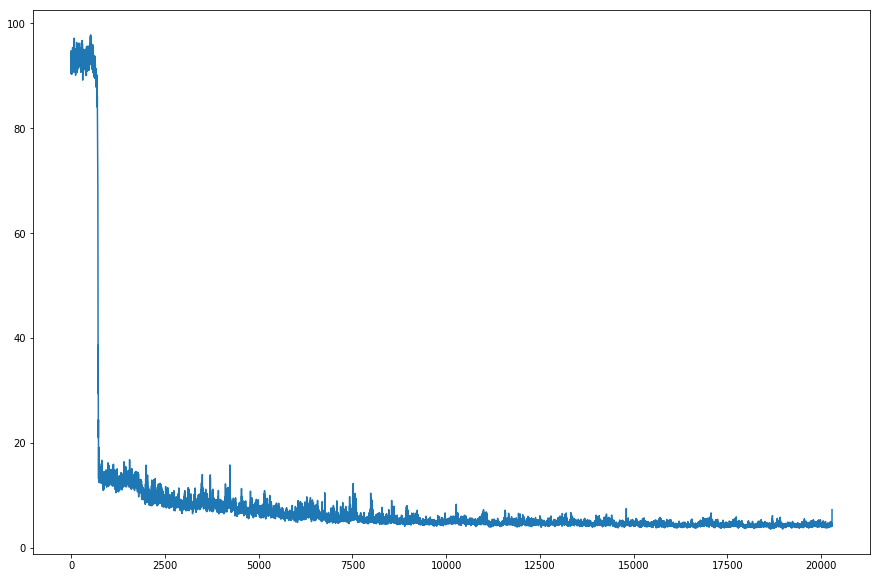

train index: [443 224 408 411 259 252 449 427 476 230 417 276 485 211 471 262 446 437
 225 284 240 216 212 484 438 237 404 413 450]
validate index : [220 213 281 452]
test index : [439 226 472 401 482]
Tensor("pool1/Squeeze:0", shape=(?, 1250, 64), dtype=float32)
Tensor("pool2/Squeeze:0", shape=(?, 417, 128), dtype=float32)
Tensor("pool3/Squeeze:0", shape=(?, 139, 256), dtype=float32)
Tensor("pool4/Squeeze:0", shape=(?, 47, 512), dtype=float32)
Tensor("Flatten/flatten/Reshape:0", shape=(?, 8192), dtype=float32)
Tensor("dropout/mul:0", shape=(?, 4096), dtype=float32)
Tensor("dropout_1/mul:0", shape=(?, 4096), dtype=float32)
Tensor("fc8/BiasAdd:0", shape=(?, 2), dtype=float32)
training...
Testing...
saved 13.85_6.12_y.txt
saved 13.85_6.12_p.txt
saved 13.85_6.12_i.txt
Testing...
saved 12.99_6.64_y.txt
saved 12.99_6.64_p.txt
saved 12.99_6.64_i.txt
Testing...
saved 14.98_7.17_y.txt
saved 14.98_7.17_p.txt
saved 14.98_7.17_i.txt
Testing...
saved 11.19_5.76_y.txt
saved 11.19_5.76_p.txt
saved 1

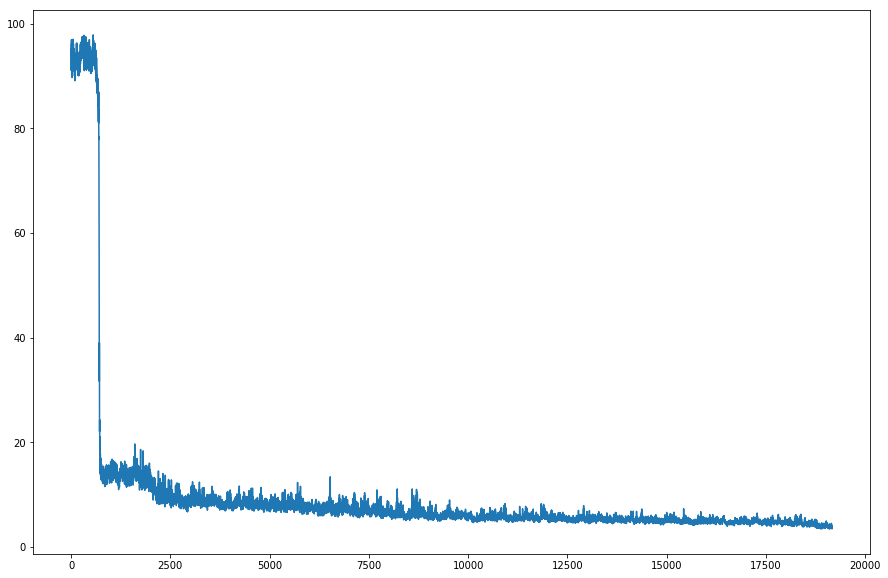

In [4]:
num_current = 0
foldername = "tfrecords-batches/"
cv = KFold(n_splits=4, shuffle=True, random_state=0)
for train_index, test_index in cv.split(subjects):
    test_ratio = 0.5
    test_size = int(len(subjects[test_index]) * test_ratio)

    subjects_train = subjects[train_index]
    subjects_validate = subjects[test_index[:test_size]]
    subjects_test = subjects[test_index[test_size:]]
    print("train index:", subjects_train)
    print("validate index :", subjects_validate)
    print("test index :", subjects_test)
    print("=" * 80 )
    train_filenames = get_tflist(path, foldername, subjects_train)
    validate_filenames = get_tflist(path, foldername, subjects_validate)
    test_filenames = get_tflist(path, foldername, subjects_test)

    tf.reset_default_graph()
    graph = tf.get_default_graph()
    sess = tf.Session(graph=graph)
    model = vgg16.VGG16(signal_length=3750, num_inputs=2, num_outputs=2, learning_rate=0.001)
    model.build()
    sess.run(tf.global_variables_initializer())
    saver = tf.train.Saver()
    print('training...')
    
    num_epochs = 3
    train_costs = []
    
    train_iterator = input_fn(filenames=train_filenames, batch_size=256, buffer_size=8192)
    validate_iterator = input_fn(filenames=validate_filenames, batch_size=2048, buffer_size=8192)
    test_iterator = input_fn(filenames=test_filenames, batch_size=2048, buffer_size=8192)
    train_next = train_iterator.get_next()
    validate_next = validate_iterator.get_next()
    test_next = test_iterator.get_next()

    for epoch in range(num_epochs):               
        sess.run(train_iterator.initializer)
        while True:
            try:
                ECG, PPG, SBP, DBP, a = sess.run(train_next)
                ECG = min_max_scaler(ECG)
                PPG = min_max_scaler(PPG)
                x_batch = np.dstack([ECG, PPG])
                y_batch = np.hstack([SBP, DBP])
                _, cost = sess.run ([model.optimizer, model.cost],
                            feed_dict={
                                model.input_x: x_batch,
                                model.input_y: y_batch,
                                model.dropout_keep_prob: 1.0
                            })
                train_costs.append(cost)
            except (tf.errors.OutOfRangeError, KeyboardInterrupt) as e:
                test_fn(sess, validate_iterator, validate_next)
                break

    test_fn(sess, test_iterator, test_next)
    draw_result(train_costs)
    saver.save(sess, './model/model%02d.ckpt' % num_current)
    num_current += 1
    sess.close()